## Data Import 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import tools as tool
from tools import utils as util

In [2]:
data = pd.read_csv('data/House_Price.csv')

In [3]:
#selecting all columns that do not have numeric values
object_column = data.select_dtypes(include = ['object']).columns.tolist()

## Feature Processing (One Hot Encoding)

In [6]:
for column in object_column:
    data = util.one_hot_encoding(data, column)
ohc_data = data

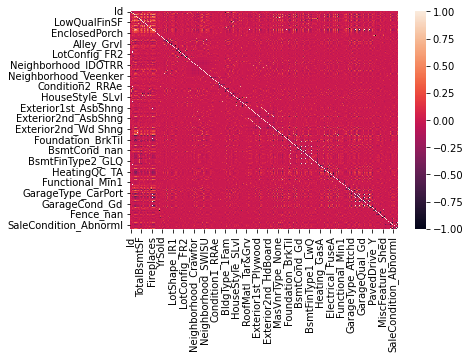

In [7]:
sns_plot = sns.heatmap(ohc_data.corr())
fig = sns_plot.get_figure()
fig.savefig("figures/ohc_data_heatmap")

In [8]:
threshold = 0.7

df_corr = ohc_data.corr()

columns = np.full((df_corr.shape[0],), True, dtype=bool)

for i in range(df_corr.shape[0]):
    for j in range(i+1, df_corr.shape[0]):
        if df_corr.iloc[i,j] >= threshold:
            if columns[j]:
                columns[j] = False


selected_columns = ohc_data.columns[~columns]
high_correlation = ohc_data[selected_columns]

In [9]:
absolute_corr = np.abs(df_corr["SalePrice"])
df_corr["SalePrice"][absolute_corr > 0.5]

OverallQual       0.790982
YearBuilt         0.522897
YearRemodAdd      0.507101
TotalBsmtSF       0.613581
1stFlrSF          0.605852
GrLivArea         0.708624
FullBath          0.560664
TotRmsAbvGrd      0.533723
GarageCars        0.640409
GarageArea        0.623431
SalePrice         1.000000
ExterQual_TA     -0.589044
BsmtQual_Ex       0.553105
KitchenQual_Ex    0.504094
KitchenQual_TA   -0.519298
Name: SalePrice, dtype: float64

In [10]:
selected_columns

Index(['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'SalePrice',
       'Neighborhood_Somerst', 'HouseStyle_2Story', 'RoofStyle_Shed',
       'RoofMatl_Tar&Grv', 'Exterior2nd_AsbShng', 'Exterior2nd_CBlock',
       'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd',
       'Exterior2nd_Plywood', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd',
       'Exterior2nd_Wd Sdng', 'BsmtQual_nan', 'BsmtCond_nan',
       'BsmtExposure_nan', 'BsmtFinType1_nan', 'BsmtFinType2_nan',
       'Electrical_Mix', 'GarageFinish_nan', 'GarageQual_nan', 'GarageCond_Ex',
       'GarageCond_TA', 'GarageCond_nan', 'MiscFeature_Gar2',
       'MiscFeature_TenC', 'SaleCondition_Partial'],
      dtype='object')

In [11]:
high_correlation.corr().head()

,1stFlrSF,TotRmsAbvGrd,GarageYrBlt,GarageArea,SalePrice,Neighborhood_Somerst,HouseStyle_2Story,RoofStyle_Shed,RoofMatl_Tar&Grv,Exterior2nd_AsbShng,...,BsmtFinType2_nan,Electrical_Mix,GarageFinish_nan,GarageQual_nan,GarageCond_Ex,GarageCond_TA,GarageCond_nan,MiscFeature_Gar2,MiscFeature_TenC,SaleCondition_Partial
1stFlrSF,1.000000,0.409516,0.233449,0.489782,0.605852,-0.018495,-0.269813,0.017622,0.071021,-0.063332,...,-0.018376,-0.005801,-0.154846,-0.154846,-0.032741,0.186819,-0.154846,-0.000300,0.015539,0.221037
TotRmsAbvGrd,0.409516,1.000000,0.148112,0.337822,0.533723,-0.015275,0.430930,0.033786,-0.013142,0.002335,...,-0.012382,-0.008343,-0.088285,-0.088285,-0.045995,0.072106,-0.088285,0.045183,0.088332,0.142032
GarageYrBlt,0.233449,0.148112,1.000000,0.564567,0.486362,0.277452,0.186831,-0.000782,-0.050926,-0.136388,...,-0.070103,-0.063858,NaN,NaN,0.013116,0.275846,NaN,-0.015451,-0.000552,0.349327
GarageArea,0.489782,0.337822,0.564567,1.000000,0.623431,0.184533,0.137946,0.020798,-0.006663,-0.092541,...,-0.075543,-0.016534,-0.536333,-0.536333,0.024090,0.485444,-0.536333,-0.003896,0.011149,0.294714
SalePrice,0.605852,0.533723,0.486362,0.623431,1.000000,0.140058,0.242880,0.020557,0.004921,-0.099220,...,-0.145274,-0.037555,-0.236832,-0.236832,-0.026546,0.275872,-0.236832,-0.004744,0.022773,0.352060


## Log Sale Price

/srv/conda/envs/housetools/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


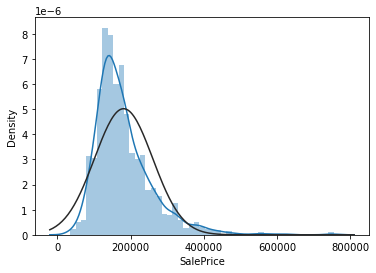

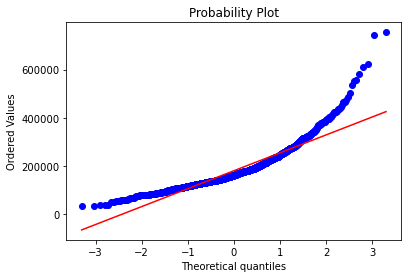

In [155]:
util.dist_and_prob_plot(data, 'SalePrice')

/srv/conda/envs/housetools/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


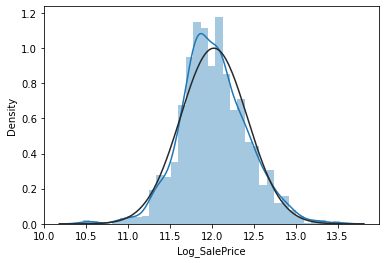

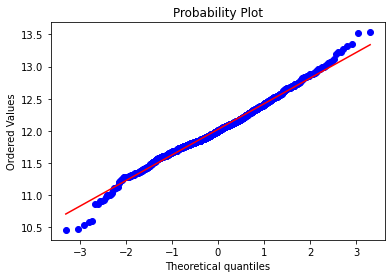

In [156]:
data['Log_SalePrice'] = np.log(data['SalePrice'])
util.dist_and_prob_plot(data, 'Log_SalePrice')

In [ ]:
ohc_data['SalePrice'] = np.log(ohc_data['SalePrice'])
ohc_data = ohc_data.drop('Log_SalePrice', axis = 1)

NameError: name 'np' is not defined

## Random Forest Model (One Hot Encoding)

In [ ]:
ohc_data = ohc_data.dropna()
X = ohc_data.drop(['SalePrice', 'Id'], axis = 'columns')
y = ohc_data['SalePrice']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)
rf = RandomForestRegressor(n_estimators=500)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500)

In [ ]:
#made a dataframe with values greater than .001 importance
#sorted the values to look better on bargraph
dataframe = pd.DataFrame(rf.feature_importances_, rf.feature_names_in_)
a = dataframe[dataframe[0] > .001]
a = a.rename(columns = {0: 'values'})
b = a.sort_values('values', ascending = True)
b.head()

,values
BsmtFullBath,0.001081
KitchenQual_Ex,0.001132
Neighborhood_Crawfor,0.001156
KitchenQual_TA,0.001257
BsmtQual_TA,0.001313


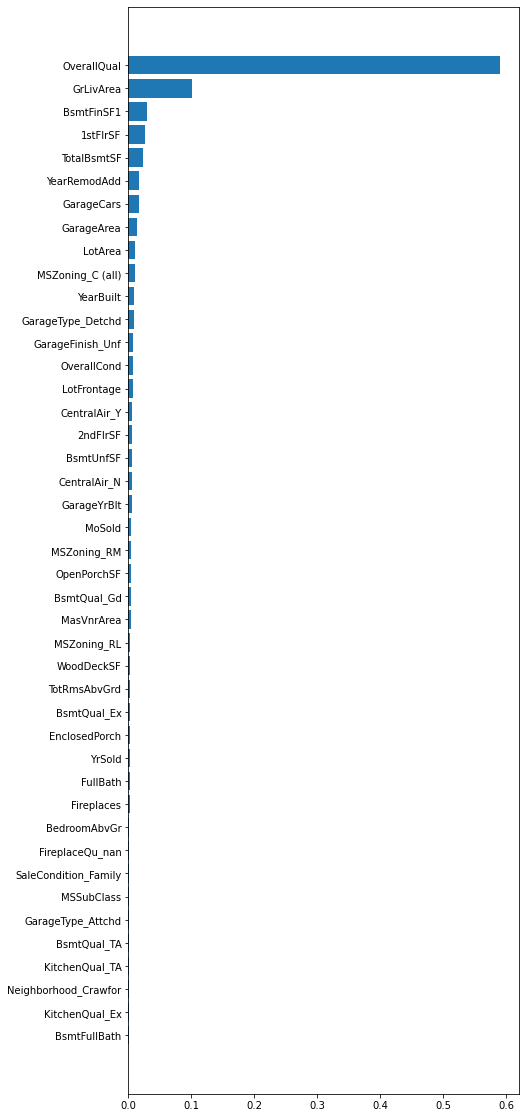

In [ ]:
plt.figure(figsize=(7, 20))
plt.barh(b.index, b['values'])
plt.title('Feature Importance Above .001')
plt.ylabel('Features')
plt.xlabel('Importance')
plt.savefig('figures/Top 44 One Hot Encoding Feature Importance)')

In [ ]:
#made another dataframe with a smaller importance threshold
dataframe = pd.DataFrame(rf.feature_importances_, rf.feature_names_in_)
c = dataframe[dataframe[0] > .01]
c = c.rename(columns = {0: 'values'})
d = c.sort_values('values', ascending = True)
d

,values
MSZoning_C (all),0.010085
LotArea,0.011035
GarageArea,0.014288
GarageCars,0.016755
YearRemodAdd,0.017418
TotalBsmtSF,0.023808
1stFlrSF,0.025788
BsmtFinSF1,0.028824
GrLivArea,0.100983
OverallQual,0.590504


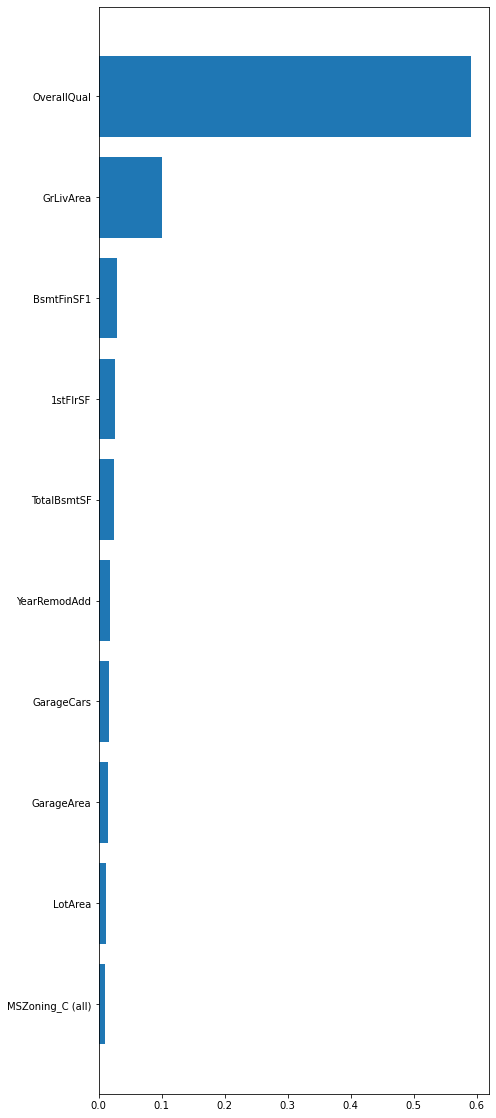

In [ ]:
plt.figure(figsize=(7, 20))
plt.barh(d.index, d['values'])
plt.title('Feature Importance Above .001')
plt.ylabel('Features')
plt.xlabel('Importance')
plt.savefig('figures/Top 10 One Hot Encoding Feature Importance')

In [351]:
y_output = rf.predict(X_test)

In [352]:
print('MSE', mean_squared_error(y_test, y_output))
print('RMSE', (mean_squared_error(y_test, y_output) ** (1/2)))
print('Adj R^2 value:', r2_score(y_test, y_output))

MSE 0.023397237595640556
RMSE 0.15296155594017916
Adj R^2 value: 0.8655196046473326


In [62]:
pd.DataFrame({'Type of Error':['MSE', 'RMSE', 'Adj R^2 Value'],'Value' : [mean_squared_error(y_test, y_output), (mean_squared_error(y_test, y_output))** (1/2),  r2_score(y_test, y_output)]}).set_index('Type of Error').to_csv('data/OHC_Error_Table.csv')